In [1]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import cifar10
import matplotlib.pyplot as plt
import numpy as np


In [2]:
# Load CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# Normalize the pixel values between 0 and 1
x_train, x_test = x_train / 255.0, x_test / 255.0

# Convert class labels to one-hot encoding
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)


In [3]:
def create_basic_cnn():
    model = models.Sequential()
    
    # 1st Convolutional Layer
    model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
    model.add(layers.MaxPooling2D((2, 2)))
    
    # 2nd Convolutional Layer
    model.add(layers.Conv2D(64, (3, 3), activation='relu'))
    model.add(layers.MaxPooling2D((2, 2)))
    
    # Fully Connected Layer
    model.add(layers.Flatten())
    model.add(layers.Dense(64, activation='relu'))
    model.add(layers.Dense(10, activation='softmax'))
    
    return model


In [4]:
def create_deep_cnn():
    model = models.Sequential()
    
    # 1st Convolutional Layer
    model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
    model.add(layers.MaxPooling2D((2, 2)))
    
    # 2nd Convolutional Layer
    model.add(layers.Conv2D(64, (3, 3), activation='relu'))
    model.add(layers.MaxPooling2D((2, 2)))
    
    # 3rd Convolutional Layer
    model.add(layers.Conv2D(128, (3, 3), activation='relu'))
    model.add(layers.MaxPooling2D((2, 2)))
    
    # Fully Connected Layer
    model.add(layers.Flatten())
    model.add(layers.Dense(128, activation='relu'))
    model.add(layers.Dense(10, activation='softmax'))
    
    return model


In [5]:
def compile_and_train(model, x_train, y_train, x_test, y_test, epochs=10, batch_size=64):
    model.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
    
    history = model.fit(x_train, y_train, epochs=epochs, batch_size=batch_size,
                        validation_data=(x_test, y_test))
    return history


In [6]:
def create_wider_cnn():
    model = models.Sequential()
    
    # 1st Convolutional Layer with 5x5 filters
    model.add(layers.Conv2D(32, (5, 5), activation='relu', input_shape=(32, 32, 3)))
    model.add(layers.MaxPooling2D((2, 2)))
    
    # 2nd Convolutional Layer with 5x5 filters
    model.add(layers.Conv2D(64, (5, 5), activation='relu'))
    model.add(layers.MaxPooling2D((2, 2)))
    
    # Fully Connected Layer
    model.add(layers.Flatten())
    model.add(layers.Dense(128, activation='relu'))
    model.add(layers.Dense(10, activation='softmax'))
    
    return model


In [7]:
def plot_history(history, title):
    plt.plot(history.history['accuracy'], label='accuracy')
    plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.ylim([0, 1])
    plt.title(title)
    plt.legend(loc='lower right')
    plt.show()


C:\Users\vedan\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 10s 11ms/step - accuracy: 0.3734 - loss: 1.7248 - val_accuracy: 0.5601 - val_loss: 1.2560
Epoch 2/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 8s 10ms/step - accuracy: 0.5827 - loss: 1.1906 - val_accuracy: 0.5849 - val_loss: 1.1755
Epoch 3/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 9s 12ms/step - accuracy: 0.6378 - loss: 1.0415 - val_accuracy: 0.6545 - val_loss: 0.9963
Epoch 4/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 9s 12ms/step - accuracy: 0.6665 - loss: 0.9572 - val_accuracy: 0.6662 - val_loss: 0.9642
Epoch 5/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 9s 12ms/step - accuracy: 0.6917 - loss: 0.8838 - val_accuracy: 0.6843 - val_loss: 0.9218
Epoch 6/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 9s 12ms/step - accuracy: 0.7132 - loss: 0.8269 - val_accuracy: 0.6780 - val_loss: 0.9388
Epoch 7/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 9s 12ms/step - accuracy: 0.7298 - loss: 0.7801 - val_accuracy: 0.6892 - val_loss: 0.9105
Epoch 8/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 9s 12ms/step - accuracy: 0.7434 - loss: 0.7365 - val_acc

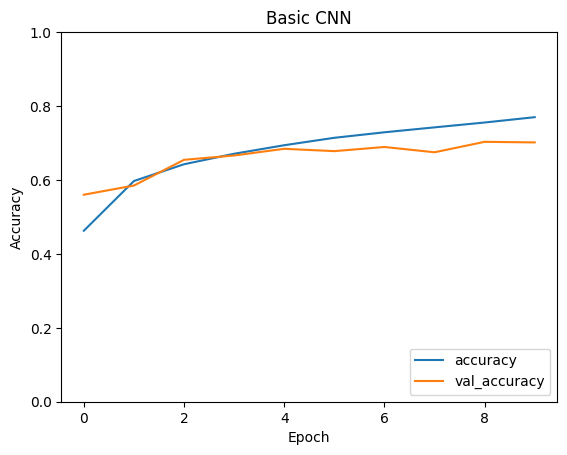

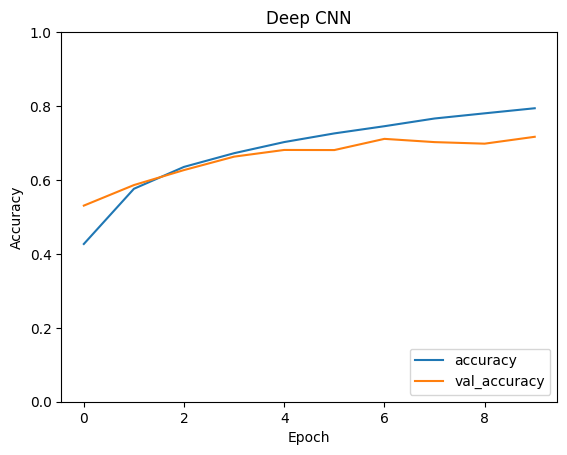

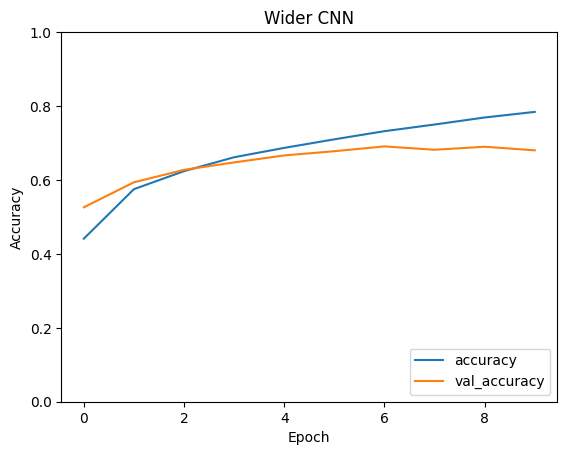

In [8]:
# Train basic CNN
basic_cnn = create_basic_cnn()
history_basic = compile_and_train(basic_cnn, x_train, y_train, x_test, y_test)

# Train deeper CNN
deep_cnn = create_deep_cnn()
history_deep = compile_and_train(deep_cnn, x_train, y_train, x_test, y_test)

# Train wider CNN with 5x5 filters
wider_cnn = create_wider_cnn()
history_wider = compile_and_train(wider_cnn, x_train, y_train, x_test, y_test)

# Plot results
plot_history(history_basic, "Basic CNN")
plot_history(history_deep, "Deep CNN")
plot_history(history_wider, "Wider CNN")
